# Loading Digit image dataset
The digits dataset consists of 8x8 pixel images of digits. The images attribute of the dataset stores 8x8 arrays of grayscale values for each image.

In [1]:
from sklearn import datasets
digits = datasets.load_digits()

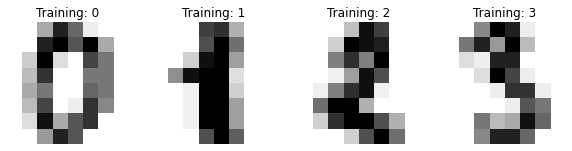

In [2]:
# First four data
import matplotlib.pyplot as plt

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [3]:
# main_data = digits['data']
# targets = digits['target']
print(digits['data'])

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [5]:
print(digits.images.reshape((len(digits.images), -1)))

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


# Support Vector Classification (SVC)
The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.

SVM chooses the extreme points/vectors that help in creating the hyperplane. These extreme cases are called as support vectors, and hence algorithm is termed as Support Vector Machine. Consider the below diagram in which there are two different categories that are classified using a decision boundary or hyperplane:
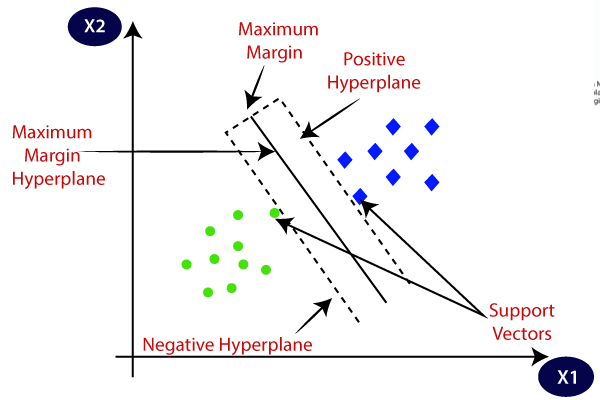

#### SVM can be of two types:

Linear SVM: Linear SVM is used for linearly separable data, which means if a dataset can be classified into two classes by using a single straight line, then such data is termed as linearly separable data, and classifier is used called as Linear SVM classifier.<br><bR>
Non-linear SVM: Non-Linear SVM is used for non-linearly separated data, which means if a dataset cannot be classified by using a straight line, then such data is termed as non-linear data and classifier used is called as Non-linear SVM classifier.

In [7]:
from sklearn import svm
from sklearn.model_selection import train_test_split

# # flatten the images
# n_samples = len(digits.images)
# data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, test_size=0.5, shuffle=False
)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

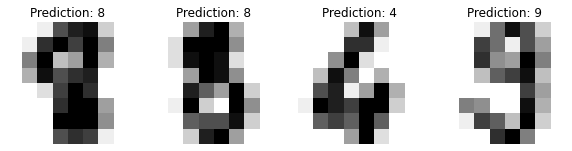

In [9]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predicted)

0.9688542825361512

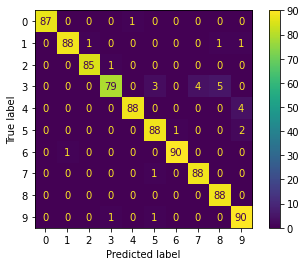

In [22]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predicted, labels=clf.classes_)
disp = metrics.ConfusionMatrixDisplay(cm,display_labels=clf.classes_)
disp.plot()
plt.show()


# DecisionTreeClassifier
Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

Algo:
- Step-1: Begin the tree with the root node, says S, which contains the complete dataset.
- Step-2: Find the best attribute in the dataset using Attribute Selection Measure (ASM).
- Step-3: Divide the S into subsets that contains possible values for the best attributes.
- Step-4: Generate the decision tree node, which contains the best attribute.
- Step-5: Recursively make new decision trees using the subsets of the dataset created in step -3. Continue this process until a stage is reached where you cannot further classify the nodes and called the final node as a leaf node.


<b>Example:</b> Suppose there is a candidate who has a job offer and wants to decide whether he should accept the offer or Not. So, to solve this problem, the decision tree starts with the root node (Salary attribute by ASM). The root node splits further into the next decision node (distance from the office) and one leaf node based on the corresponding labels. The next decision node further gets split into one decision node (Cab facility) and one leaf node. Finally, the decision node splits into two leaf nodes (Accepted offers and Declined offer). Consider the below diagram:
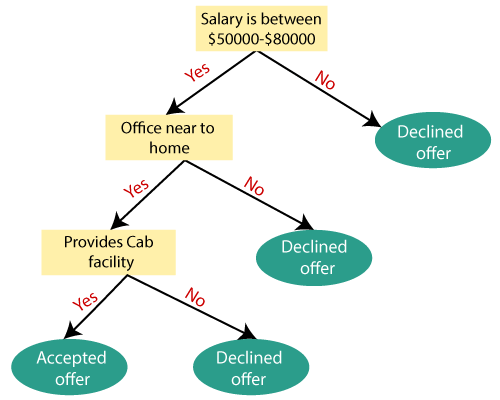

0.7575083426028921


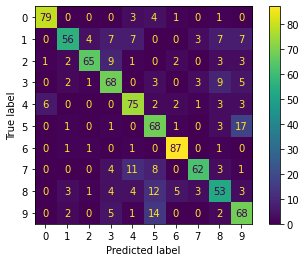

In [24]:
# import the Classifier
from sklearn.tree import DecisionTreeClassifier
# Instanciate Model
# we can also use criterion = 'entropy' both lead us to nearly same 
# result
dt = DecisionTreeClassifier(criterion = 'gini') 

# Learn the digits on the train subset
dt.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = dt.predict(X_test)
print(accuracy_score(y_test, predicted))
cm = metrics.confusion_matrix(y_test, predicted, labels=clf.classes_)
disp = metrics.ConfusionMatrixDisplay(cm,display_labels=clf.classes_)
disp.plot()
plt.show()

# RandomForestClassifier
Random Forest is a supervised machine learning algorithm made up of decision trees. Random Forest is used for both classification and regression—for example, classifying whether an email is “spam” or “not spam”

Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction (see figure below).
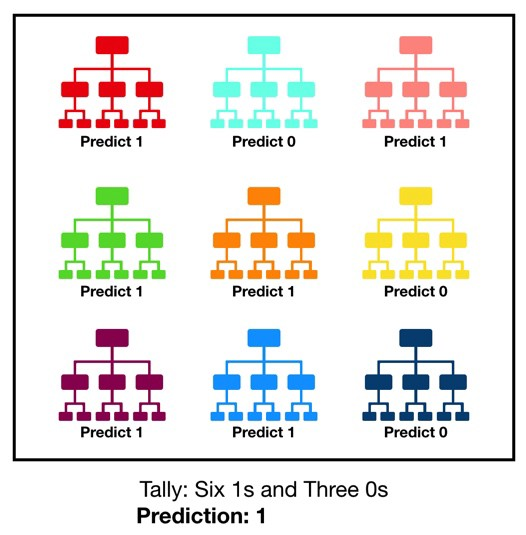

0.9365962180200222


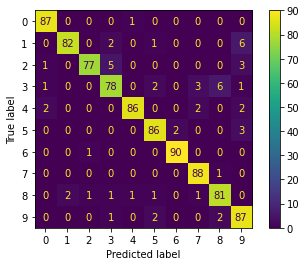

In [26]:
from sklearn.ensemble import RandomForestClassifier
# n_estimators hyperparameters( default 100 )
rc = RandomForestClassifier(n_estimators = 150)
# Training Data = 1500 , Validation data = 297
rc.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = rc.predict(X_test)
print(accuracy_score(y_test, predicted))
cm = metrics.confusion_matrix(y_test, predicted, labels=clf.classes_)
disp = metrics.ConfusionMatrixDisplay(cm,display_labels=clf.classes_)
disp.plot()
plt.show()

#### What is difference between decision tree and random forest?
The critical difference between the random forest algorithm and decision tree is that decision trees are graphs that illustrate all possible outcomes of a decision using a branching approach. In contrast, the random forest algorithm output are a set of decision trees that work according to the output.